# Monte Carlo Integration

This notebook demonstrates how to estimate the definite integral of a function using the Monte Carlo method.

**Concept:**
1. The definite integral ∫[a, b] f(x) dx represents the area under the curve of f(x) between x=a and x=b.
2. The mean value theorem for integrals states that ∫[a, b] f(x) dx = (b - a) * avg(f(x)), where avg(f(x)) is the average value of the function over the interval [a, b].
3. Monte Carlo integration approximates this average value by sampling.
4. Generate a large number (`num_samples`) of random points `x_i` uniformly distributed within the interval [a, b].
5. Evaluate the function at each random point: `f(x_i)`.
6. Calculate the sample mean (average) of these function values: `mean_f = (1 / num_samples) * Σ f(x_i)`.
7. The integral estimate is then: `(b - a) * mean_f`.

We will estimate the integral of f(x) = x² from 0 to 1.

## 1. Import Necessary Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # For comparison with exact integral
import sys
import os

# Add the project root directory to the Python path
current_dir = os.getcwd()
if os.path.basename(current_dir) == 'notebooks':
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
else:
    project_root = current_dir

if project_root not in sys.path:
    sys.path.insert(0, project_root)


try:
    from src.monte_carlo.integral_estimation import g, estimate_integral
    print("Successfully imported g and estimate_integral from src")
except ImportError as e:
    print(f"Error importing from src: {e}")
    print("Please ensure you are running this notebook from the 'learn_statistics' root directory or the 'notebooks' subdirectory.")

Successfully imported g and estimate_integral from src


## 2. Define Simulation Parameters

In [2]:
# Parameters for the integration
a = 0  # Lower bound
b = 1  # Upper bound
num_samples_to_test = [100, 1000, 10000, 100000, 500000] # Test with increasing samples

# The function to integrate (already imported as 'g')
print(f"Function to integrate: g(x) = x^2")
print(f"Integration bounds: [{a}, {b}]")

Function to integrate: g(x) = x^2
Integration bounds: [0, 1]


## 3. Run the Simulation and Compare with Exact Value

In [3]:
print(f"Estimating the integral of g(x) = x^2 from {a} to {b}:\n")
estimates = []

for num_samples in num_samples_to_test:
    if 'estimate_integral' in globals() and 'g' in globals():
        integral_estimate = estimate_integral(g, a, b, num_samples)
        estimates.append(integral_estimate)
        print(f"  Samples: {num_samples:<8} | Estimated Integral: {integral_estimate:.6f}")
    else:
        print(f"Skipping {num_samples} samples, required functions not imported correctly.")

# Calculate the exact integral for comparison
if 'g' in globals():
    exact_integral, exact_error = quad(g, a, b)
    print(f"\nExact Integral (using scipy.integrate.quad): {exact_integral:.6f}")
else:
    exact_integral = None
    print("\nCould not calculate exact integral, function 'g' not imported.")

Estimating the integral of g(x) = x^2 from 0 to 1:

  Samples: 100      | Estimated Integral: 0.338166
  Samples: 1000     | Estimated Integral: 0.345260
  Samples: 10000    | Estimated Integral: 0.325957
  Samples: 100000   | Estimated Integral: 0.333269
  Samples: 500000   | Estimated Integral: 0.333472

Exact Integral (using scipy.integrate.quad): 0.333333


## 4. Visualize Convergence

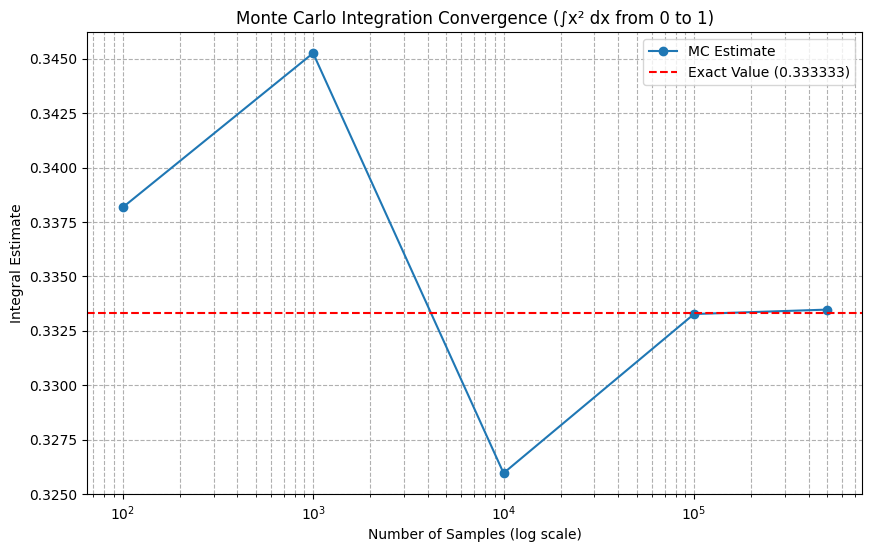

In [4]:
# Ensure plots appear inline
%matplotlib inline

if estimates and exact_integral is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(num_samples_to_test, estimates, marker='o', linestyle='-', label='MC Estimate')
    plt.axhline(y=exact_integral, color='r', linestyle='--', label=f'Exact Value ({exact_integral:.6f})')
    plt.xscale('log')
    plt.xlabel("Number of Samples (log scale)")
    plt.ylabel("Integral Estimate")
    plt.title("Monte Carlo Integration Convergence (∫x² dx from 0 to 1)")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("Cannot plot results. Ensure estimates were generated and exact integral was calculated.")

## 5. Visualize Absolute Error

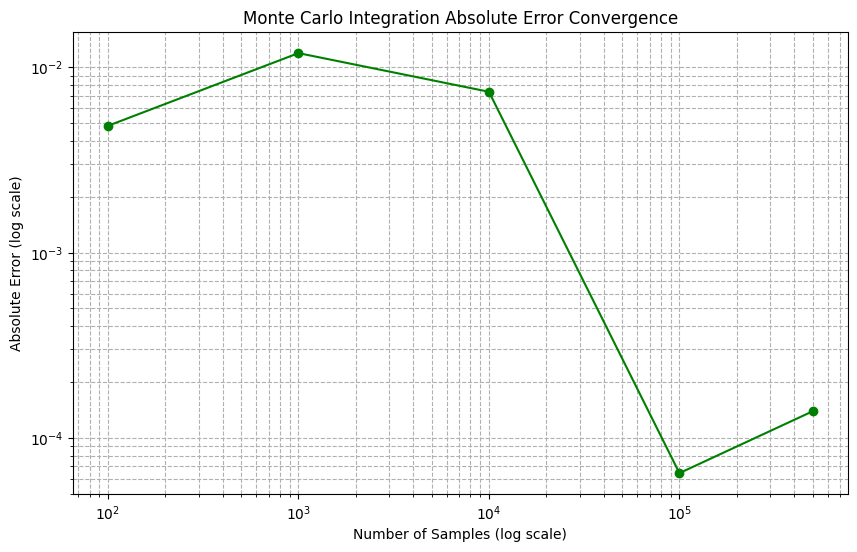

In [5]:
# Ensure plots appear inline
%matplotlib inline

if estimates and exact_integral is not None:
    # Calculate absolute errors
    absolute_errors = [abs(est - exact_integral) for est in estimates]
    
    plt.figure(figsize=(10, 6))
    plt.plot(num_samples_to_test, absolute_errors, marker='o', linestyle='-', color='g')
    plt.xscale('log')
    plt.yscale('log') # Log scale often helps visualize error reduction
    plt.xlabel("Number of Samples (log scale)")
    plt.ylabel("Absolute Error (log scale)")
    plt.title("Monte Carlo Integration Absolute Error Convergence")
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("Cannot plot errors. Ensure estimates were generated and exact integral was calculated.")

The plot shows that as the number of samples increases, the Monte Carlo estimate tends to converge towards the exact value of the integral (1/3 = 0.333...). The error plot above shows that the absolute error generally decreases as the number of samples increases, consistent with the law of large numbers.